<a href="https://colab.research.google.com/github/jjoy896/jjoy6__64061/blob/main/Assignment_1/jjoy6_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignent_1 Jacob Joy

Loading the IMDB dataset

In [ ]:
#Importing libraries that will be used
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

#importing IMBD Dataset and setting word count to top 10,000
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#Attempting to add some standardisation to RNG for better comparisons
#Setting seed to 113 as this is the default seed used in the IMBD data set
os.environ['PYTHONHASHSEED'] = str(113)
random.seed(113)

# Set the seed for NumPy
np.random.seed(113)

# Set the seed for TensorFlow
tf.random.set_seed(113)

# Enable deterministic operations
tf.config.experimental.enable_op_determinism()

# Setting the seed may not make exactly reproducable results but helps to keep them as close as can be without more complex coding.

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Multi-hot encoding of data and labels

In [ ]:
# Using manual Multi-hot encoding
# Attempted to use keras to_categorical but would run out of memory
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Validation Set

In [ ]:
#Creation of validation set from the training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Building of different models for testing.

In [ ]:

#Experiment 1
"""
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 2
"""
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 3
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 4
"""
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 5
"""
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 6
"""
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 7
"""
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

"""

#Experiment 8
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 9
"""
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 10
"""
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 11
"""
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 12
"""
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 13
"""
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 14
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 15
"""
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 16,19, and 20
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 17
"""
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 18
"""
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 21 (0.2),22 (0.3), and 23 (0.5)
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 24 (0.00001), 25 (0.0001), and 26 (0.001)
"""
model = keras.Sequential([
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 27
"""
model = keras.Sequential([
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])
"""

#Final Model

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])




Compiling Model

In [ ]:

model.compile(optimizer='rmsprop',loss="binary_crossentropy", metrics=["accuracy"])

#Used for Experiment 19
#model.compile(optimizer="rmsprop",loss="mse", metrics=["accuracy"])

#Used for Experiment 20
#model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

Training Model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.6169 - loss: 0.6402 - val_accuracy: 0.8332 - val_loss: 0.3948
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8484 - loss: 0.3768 - val_accuracy: 0.8818 - val_loss: 0.2914
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8990 - loss: 0.2673 - val_accuracy: 0.8883 - val_loss: 0.2850
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9263 - loss: 0.2076 - val_accuracy: 0.8880 - val_loss: 0.3042
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9462 - loss: 0.1565 - val_accuracy: 0.8849 - val_loss: 0.3470
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9559 - loss: 0.1249 - val_accuracy: 0.8864 - val_loss: 0.3662
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9734 - loss: 0.0813 - val_accuracy: 0.8811 - val_loss: 0.4654
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9769 - loss: 0.0674 - val_accuracy: 0.8775 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plotting taining and Validation loss

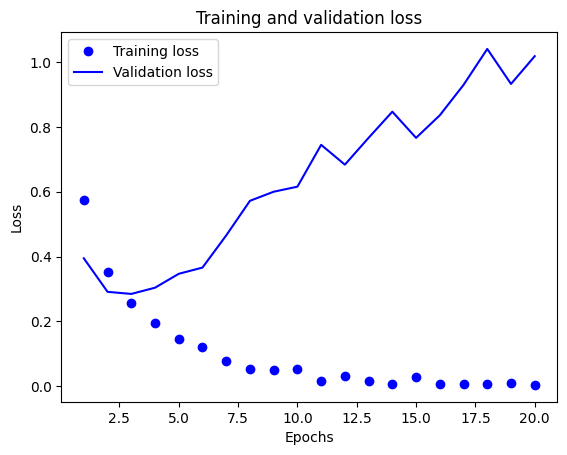

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting training and Validation acccuracy

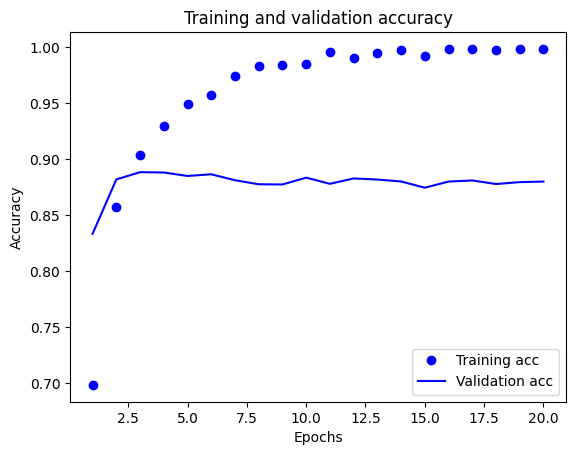

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining the model using number of epochs set before validation deteriorates

In [ ]:
#Experiment 1
"""
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 2
"""
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""


#Experiment 3
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 4
"""
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 5
"""
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""
#Experiment 6
"""
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 7
"""
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 8
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 9
"""
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 10
"""
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 11
"""
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 12
"""
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 13
"""
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 14
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 15
"""
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 16,19, and 20
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 17
"""
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 18
"""
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 21 (0.2),22 (0.3), and 23 (0.5)
"""
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
"""
#Experiment 24 (0.00001), 25 (0.0001), and 26 (0.001)
"""
model = keras.Sequential([
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
"""

#Experiment 27
"""
model = keras.Sequential([
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, kernel_regularizer= l2(0.00001), activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])
"""

#Final Model

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")
])


model.compile(optimizer='rmsprop',loss="binary_crossentropy", metrics=["accuracy"])

#Used for Experiment 19
#model.compile(optimizer="rmsprop",loss="mse", metrics=["accuracy"])

#Used for Experiment 20
#model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results_test = model.evaluate(x_test, y_test)
results_val = model.evaluate(x_val, y_val)
results_train = model.evaluate(x_train, y_train)
print('Training results (loss,Acc)')
print(results_train)
print('Val results (loss,Acc)')
print(results_val)
print('Test results (loss,Acc)')
print(results_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6625 - loss: 0.5996
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8784 - loss: 0.3153
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9156 - loss: 0.2265
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8874 - loss: 0.2966
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9579 - loss: 0.1184
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9578 - loss: 0.1203
Training results (loss,Acc)
[0.12189925462007523, 0.957319974899292]
Val results (loss,Acc)
[0.1203325092792511, 0.9587000012397766]
Test results (loss,Acc)
[0.29753419756889343, 0.8867200016975403]


Predict

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.07631286],
       [0.9999299 ],
       [0.908958  ],
       ...,
       [0.06250498],
       [0.03814842],
       [0.79949695]], dtype=float32)